In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import swarmplot
from pathlib import Path
import datetime
from ydata_profiling import ProfileReport
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pmdarima as pm
#from fbprophet import Prophet

import xgboost as xgb


from pandas import to_datetime
from pmdarima.model_selection import train_test_split
from numpy import *

from sklearn import datasets, linear_model
from sklearn.datasets import load_wine
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr

%matplotlib inline

import random
from numpy import * 
from sklearn.metrics import roc_curve, auc

import itertools
import warnings
import time

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score,mean_absolute_error


warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [2]:
def load_demand_full_data():
    return pd.read_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/model_data.csv"))

In [3]:
# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('knn', KNeighborsRegressor()))
 level0.append(('cart', DecisionTreeRegressor()))
 level0.append(('svm', SVR()))
 # define meta learner model
 level1 = LinearRegression()
 # define the stacking ensemble
 model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
 return model

In [4]:
dem_data = load_demand_full_data()

In [5]:
# get a list of models to evaluate
def get_models():
 models = dict()
 models['knn'] = KNeighborsRegressor()
 models['cart'] = DecisionTreeRegressor()
 models['svm'] = SVR()
 models['stacking'] = get_stacking()
 return models

In [6]:

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [7]:
dem_data.head()

,Year,Month,temp_mean,temp_min,temp_max,demand_mean,total_consumption,demand_max,demand_mean_max,pv_capacity,population,gsp
0,2010,1,20.868008,1.6,41.1,8941.450389,6554083.135,13765.04,10613.530000,28278.392,7110454,44504.25
1,2010,2,20.218907,3.2,35.4,8855.467677,5831325.465,13377.27,10380.667860,32153.986,7119405,44504.25
2,2010,3,19.828286,6.3,34.7,8698.725127,6319623.805,11991.47,10132.978710,38195.588,7128356,44504.25
3,2010,4,17.593856,6.5,29.9,8452.863411,5984627.295,11436.13,9804.072333,45142.723,7133668,44504.25
4,2010,5,15.323485,3.1,28.4,8897.770510,6459781.390,12386.49,10558.023550,54370.332,7138980,44504.25


In [8]:
demand = dem_data.drop([ 'Year', 'Month', 'temp_min', 'temp_max', 'demand_max'], axis=1)

In [9]:
demand.head()

,temp_mean,demand_mean,total_consumption,demand_mean_max,pv_capacity,population,gsp
0,20.868008,8941.450389,6554083.135,10613.530000,28278.392,7110454,44504.25
1,20.218907,8855.467677,5831325.465,10380.667860,32153.986,7119405,44504.25
2,19.828286,8698.725127,6319623.805,10132.978710,38195.588,7128356,44504.25
3,17.593856,8452.863411,5984627.295,9804.072333,45142.723,7133668,44504.25
4,15.323485,8897.770510,6459781.390,10558.023550,54370.332,7138980,44504.25


In [10]:
Meandemand = demand.drop(['total_consumption','demand_mean_max', 'gsp'], axis=1)

In [11]:
Meandemand.head()

,temp_mean,demand_mean,pv_capacity,population
0,20.868008,8941.450389,28278.392,7110454
1,20.218907,8855.467677,32153.986,7119405
2,19.828286,8698.725127,38195.588,7128356
3,17.593856,8452.863411,45142.723,7133668
4,15.323485,8897.770510,54370.332,7138980


In [12]:
MeanMaxdemand = demand.drop(['total_consumption','demand_mean', 'gsp'], axis=1)

In [13]:
MeanMaxdemand.head()

,temp_mean,demand_mean_max,pv_capacity,population
0,20.868008,10613.530000,28278.392,7110454
1,20.218907,10380.667860,32153.986,7119405
2,19.828286,10132.978710,38195.588,7128356
3,17.593856,9804.072333,45142.723,7133668
4,15.323485,10558.023550,54370.332,7138980


In [14]:

min_max = MinMaxScaler()

demand_min_max = min_max.fit_transform(Meandemand)
demandMeanMax_min_max = min_max.fit_transform(MeanMaxdemand)

In [15]:
scaled_df_MaxDemand = pd.DataFrame(demandMeanMax_min_max, columns=['temp_mean', 'demand_mean_max', 
       'pv_capacity', 'population'])

In [16]:
scaled_df = pd.DataFrame(demand_min_max, columns=['temp_mean', 'demand_mean', 
       'pv_capacity', 'population'])

In [17]:
MeanMaxdemand.to_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/MeanMaxDemand.txt"),  sep=',', index=False, header=None)

In [18]:
Meandemand.to_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/MeanDemand.txt"),  sep=',', index=False, header=None)

### Stacking for Regression - Mean Max Demand with Normalisation

In [19]:
X = scaled_df_MaxDemand.iloc[:,[0,2,3]].values
y = scaled_df_MaxDemand.iloc[:, 1].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [21]:
# get the models to evaluate
models = get_models()

In [22]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>knn -0.086 (0.028)
>cart -0.080 (0.018)
>svm -0.072 (0.019)
>stacking -0.066 (0.016)


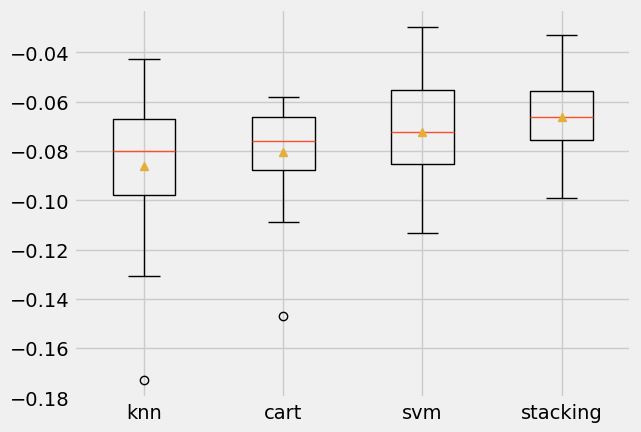

In [23]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

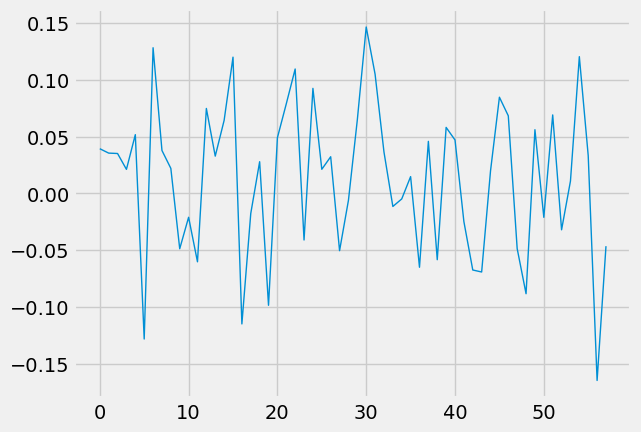

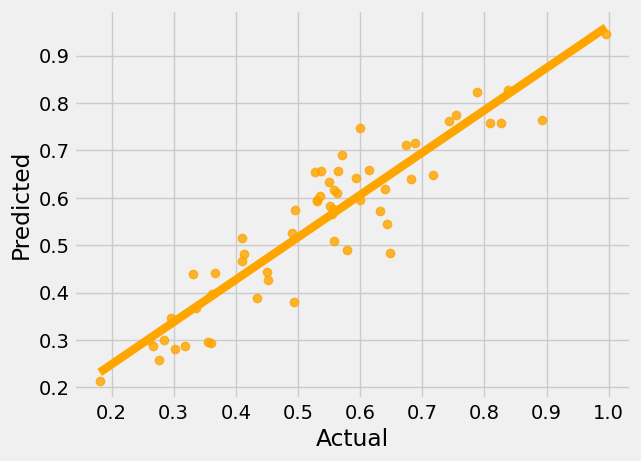

RMSE: 0.06858283326427905
R-Squared: 0.8445078456421403


In [24]:
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
# make a prediction for one example
yhat = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, yhat))
rsquared = r2_score(y_test, yhat)
residuals = yhat - y_test
plt.plot(residuals, linewidth=1)
plt.savefig('scikit_linear.png')
plt.show()
sns.regplot(x=y_test,y=yhat,ci=None,color ='orange');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.savefig('regression_plot_2 features.png')
plt.show()
print('RMSE:', rmse)
print('R-Squared:', rsquared)


# Stacking for Regression - Mean Demand with Normalisation

In [25]:
X1 = scaled_df.iloc[:,[0,2,3]].values
y1 = scaled_df.iloc[:, 1].values

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4, random_state = 42)

In [27]:
# get the models to evaluate
models = get_models()

In [28]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X1_train, y1_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>knn -0.071 (0.021)
>cart -0.072 (0.018)
>svm -0.060 (0.017)
>stacking -0.056 (0.017)


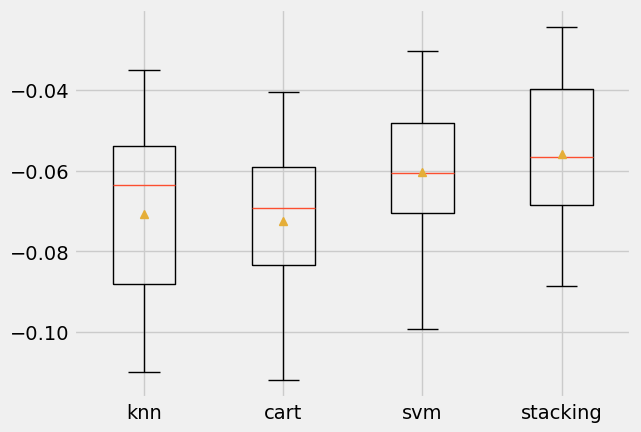

In [29]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

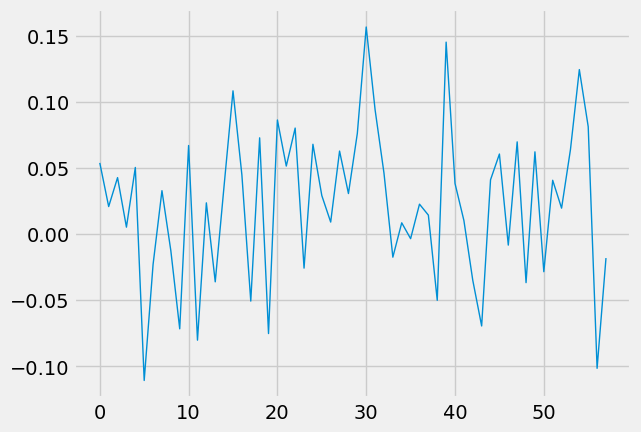

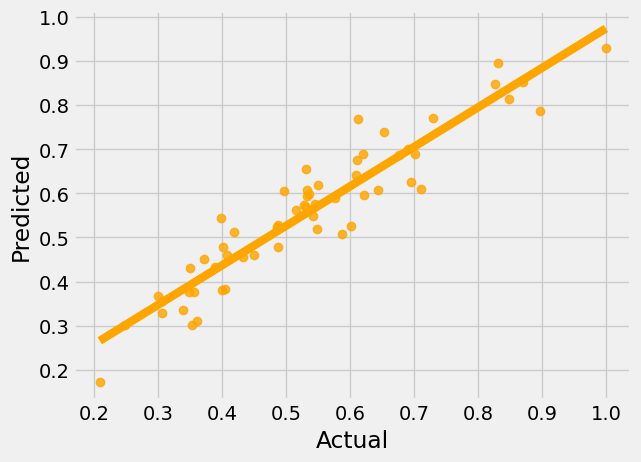

RMSE: 0.06223102856455393
R-Squared: 0.8671702264136465


In [30]:
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X1_train, y1_train)
# make a prediction for one example
ypred = model.predict(X1_test)
rmse = np.sqrt(mean_squared_error(y1_test, ypred))
rsquared = r2_score(y1_test, ypred)
residuals = ypred - y1_test
plt.plot(residuals, linewidth=1)
plt.savefig('scikit_linear.png')
plt.show()
sns.regplot(x=y1_test,y=ypred,ci=None,color ='orange');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.savefig('regression_plot_2 features.png')
plt.show()
print('RMSE:', rmse)
print('R-Squared:', rsquared)
